In [1]:
import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()

results_directory = 'Final Results (Random Initial State)/'

In [2]:
def GA_Plotter(directory_name, linestyle, color):
    maxs = []
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, 
                         plotDataPoints = False, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$'
                        ) # + '\nnumber of motion sensors placed: ' + str(average_sens / 5),)
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))


    # print(max(D))
    # gai.plot_convergence(D, xlabel="Number of iterations $n$\n" + 'number of motion sensors placed: ' + str(int(sensor_num[acc.index(max(acc))])),)
    # plt.show()


In [3]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color):
    maxs = []
    test = []
    D = [0]*1000
    results = boi.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
        
    D = [d / len(results) for d in D]
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    # print(max(D))
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    

	GA (0.5)performance: 57.60705050476916 $\pm$ 2.58408594804697
	BO (5-0.5)performance: 72.4758168336011 $\pm$ 1.0895635580188985
	BO (7-0.5)performance: 76.57565137645507 $\pm$ 1.9363906448037151
	BO (9-0.5)performance: 73.45257396655435 $\pm$ 1.6152255725871585
	BO (11-0.5)performance: 74.17916578566698 $\pm$ 1.5998994097247563
	BO (13-0.5)performance: 75.22100019449935 $\pm$ 0.9434954409359625
	BO (15-0.5)performance: 75.30504287716583 $\pm$ 1.4083578794611866


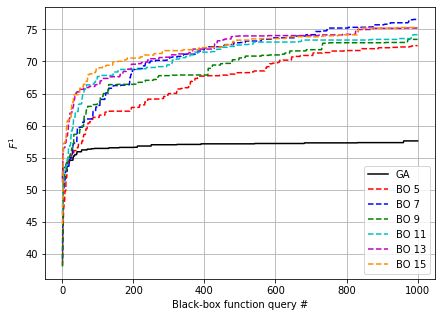

	GA (1)performance: 54.797498296211906 $\pm$ 1.8538166587191294
	BO (5-1)performance: 68.48702164207734 $\pm$ 4.420616144068898
	BO (7-1)performance: 72.88518321376532 $\pm$ 1.2770574782293624
	BO (9-1)performance: 75.3058874435803 $\pm$ 1.180031346371763
	BO (11-1)performance: 71.32834308198845 $\pm$ 1.3434930525483455
	BO (13-1)performance: 73.21440091082867 $\pm$ 1.9649248742284853
	BO (15-1)performance: 70.70477267066354 $\pm$ 0.9564712333335887


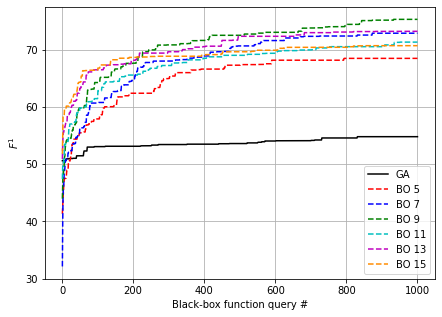

	GA (2)performance: 49.351953525055315 $\pm$ 0.33762234868342716
	BO (5-2)performance: 58.607638949173875 $\pm$ 0.8458684370089655
	BO (7-2)performance: 55.412317981101125 $\pm$ 0.7129398958335151
	BO (9-2)performance: 55.5374737798076 $\pm$ 1.214766462480173
	BO (11-2)performance: 54.73921864317706 $\pm$ 0.3974447571906339
	BO (13-2)performance: 56.811553800498714 $\pm$ 0.42711277333787384
	BO (15-2)performance: 57.31668748021383 $\pm$ 0.7073187702766429


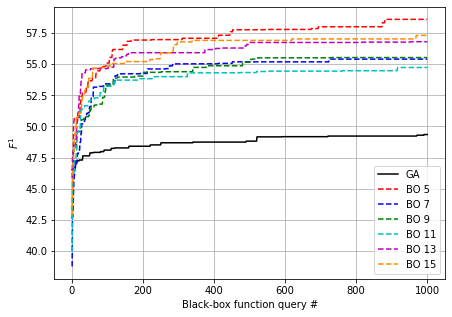

In [4]:
sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.5, 1, 2]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']


for e in epsilons:
    BOnames = ['GA']
    
    fig, ax = plt.subplots(figsize=(7, 5))
    
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter(dn1, linestyle = '-', color = 'k')
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        try:
            BO_Plotter(dn2, 
                       holdplot = True, 
                       name = dn2, 
                       e = e,
                       linestyle = styles[0][1], 
                       marker = styles[0][0],
                       color = colors[index])

            BOnames.append('BO ' + str(sn))

        except:
            print('----- No data exist in directory: ' + dn2)
            
    # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
    plt.legend(BOnames)
    # plt.grid()
    plt.show()

# Sensor Locations Animation

In [5]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  extent = [0.2, 7.7, 0.6, 7.8]
  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c):
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    for key in coordinates.keys():

        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key])
        else:
            Ys.append(coordinates[key])

    return Xs, Ys

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [14]:
def plot_sensor_locations(sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':    
        
        
        results = boi.read_files('Final Results (Random Initial State)/BO (' + 
                                 str(sensorNum) +
                                 '-' +
                                 str(epsilon) +
                                 ')') 
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
        
    elif method == 'GA':
        results = boi.read_files('Final Results (Random Initial State)/GA (0.5)/')
        result = results[filenumber]
        
        data = []
        sensor_num = []
        
        # if not filenumber == 1:
        #     result_for_print = result[0]
        #else:
        #     result_for_print = result
        
        result_for_print = result
        
        for generation in result_for_print:
            for chromosome in generation:
                data.append(chromosome[0])
                
        title = 'GA performance: ' + str(max(data))
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        matrix, labels = bo.get_confusion_matrix(c)
        
        Xs, Ys = get_sensor_locations(c)
        Xs = [xs * epsilon for xs in Xs]
        Ys = [ys * epsilon for ys in Ys]

    elif method == 'GA':
        _, configurations = result
        config = configurations[-1]
        data = config.GetSensorLocations()[0]
        config = configurations[-1]
        
        matrix, labels = ga.get_confusion_matrix(config)
        
        data = config.GetSensorLocations()[0]
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces("Agent Trace Files ROS/")
    #for i in range(len(Xs)):
    xlim=(0.0, 8.0)
    ylim=(0.0, 8.0)

    if method == 'GA':
        plt.scatter(Xs, Ys, color='b')

    elif method == 'BO':
        plt.scatter(Xs, Ys, color='r')

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread("testcase.jpg")
    im = plt.imshow(np.flipud(img), origin='upper', extent=[0.0, 8.0, 0.0, 8.0])

    HM(agent_x, agent_y)
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

In [ ]:
sensorNum = 7
epsilon = 0.5

for filenumber1 in [1]:
    for filenumber2 in [0]:
        
        fig, ax = plt.subplots(figsize=(8.0, 8.0), dpi=80)
        
        title, matrix, labels = plot_sensor_locations(sensorNum, epsilon, 'BO', filenumber1)
        bo_title = title
        bo_matrix = matrix
        bo_labels = labels
        
        title, matrix, labels = plot_sensor_locations(sensorNum, epsilon, 'GA', filenumber2)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
        
        plt.legend(['BO sensor locations', 'GA sensor locations'], loc = 'upper left')
        plt.title(ga_title + " : " + bo_title)

In [ ]:
labels = ['Undress', 
          'Take a shower', 
          'Dress', 
          'Iron', 
          'Sit and work with tablet', 
          'Exercise', 
          'Use toilet',
          'Wash hands', 
          'Watch TV', 
          'Grab ingredients from fridge',
          'Make tea', 
          'Toast breads', 
          'Grab utensils',
          'Fry eggs using stove', 
          'Eat', 
          'Take medicine',
          'Wipe dining table', 
          'Clean kitchen', 
          'Wash dishes', 
          'Grab the broom from storage',
          'Broom', 
          'Return the broom', 
          'Sleep']


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = bo_matrix[0]

for m in range(1, len(bo_matrix)):
    cm += bo_matrix[m]

    
# for m in bo_matrix:    
normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
cmn = normed_c


fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=False, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ga_matrix[0]

for m in range(1, len(ga_matrix)):
    cm += ga_matrix[m]

    
# for m in bo_matrix:    
normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
cmn = normed_c


fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=False, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

# Statistics

In [ ]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [ ]:
statistic

In [ ]:
pvalue

In [ ]:
import seaborn as sns

compare_pvalue = compare(pvalue, 0.05)

for epsilon in ['0.5', '1', '2']:
    sn = '1'

    rows = ['GA (' + epsilon + ')',
            'BO (5' '-' + epsilon + ')',
            'BO (7' + '-' + epsilon + ')',
            'BO (9' + '-' + epsilon + ')',
            'BO (11' + '-' + epsilon + ')',
            'BO (13' + '-' + epsilon + ')',
            'BO (15' + '-' + epsilon + ')',
           ]

    df = compare_pvalue.filter(like=epsilon + ')').loc[rows]
    sns.heatmap(df, annot=True, cmap="binary")
    plt.show()

In [ ]:
sns.heatmap(df, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df2, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df3, annot=True, cmap="binary")

In [ ]:
compare_pvalue

In [ ]:
accuracies

In [ ]:
BO05 = [72.4, 76.5, 73.4, 74.1, 75.2, 75.3]
BO1 = [68.4, 72.8, 75.3, 71.3, 73.2, 70.7]
BO2 = [58.6, 55.4, 55.5, 54.7, 56.8, 57.3]

print(np.mean(BO05))
print(np.std(BO05))
print('---')
print(np.mean(BO1))
print(np.std(BO1))
print('---')
print(np.mean(BO2))
print(np.std(BO2))

ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO1),  std2=np.std(BO1), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO1), std1=np.std(BO1), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)